<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/3_Project/3_Skills_Trend.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# How are in-demand skills trending for Data Analysts?

#### Methology
1. Aggregate skill counts monthly
2. Re-analyze based on percentage of total jobs
3. Plot the monthly skill demand

#### Original Exploration
[12_Exercise_Trending_Skills.ipynb](../2_Advanced/12_Exercise_Trending_Skills.ipynb)

## Import Libraries and Data

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## Group the Skills by Month

Select only those job postings that are for Data Analysts and the job country is the United States. Then extract the month from each job's posting date to see when jobs are listed. Next, converts a column that lists skills into a usable list format. Finally, it rearranges the data so that each skill from the list gets its own row.

In [ ]:
df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')].copy()

df_DA_US['month_posted'] = df_DA_US['job_posted_date'].dt.month

df_DA_US_explode = df_DA_US.explode(column='job_skills')

### Pivot in Prep for Plotting

Create a pivot table from the `df_DA_US_explode`, setting 'month' as the index, `job_skills` as the columns, and fills missing entries with zero.

In [3]:
df_DA_US_pivot = df_DA_US_explode.pivot_table(index='month_posted', columns='job_skills',  aggfunc='size', fill_value=0)

df_DA_US_pivot

job_skills,airflow,airtable,alteryx,angular,ansible,apl,arch,asana,asp.net,asp.net core,...,watson,webex,windows,wire,word,workfront,wrike,xamarin,yarn,zoom
month_posted,,,,,,,,,,,,,,,,,,,,,
1,39,7,206,21,7,1,0,15,17,0,...,7,9,80,3,968,0,7,0,0,30
2,35,0,203,23,4,1,0,14,9,0,...,6,6,92,3,738,3,0,0,0,19
3,39,1,219,5,5,6,1,14,11,0,...,7,6,76,5,736,1,1,1,0,16
4,28,1,208,8,3,7,3,5,6,0,...,2,4,86,9,695,8,1,0,0,12
5,27,3,144,15,8,9,1,5,13,0,...,1,6,67,1,557,3,0,0,0,9
6,39,5,188,9,4,8,3,7,7,0,...,5,2,69,8,721,5,0,0,0,20
7,42,2,160,5,3,5,5,6,2,0,...,4,1,59,10,587,0,0,0,1,13
8,44,2,187,5,3,10,0,5,3,0,...,3,6,87,4,752,0,0,0,0,26
9,22,3,145,11,2,3,4,4,3,0,...,0,4,80,4,478,0,0,0,1,12


#### Sort columns by count and change month numbers to names

It adds a new row labeled `Total` that sums up counts across all months for each skill. Finally, it reorders the columns based on the total counts, displaying them from highest to lowest, and shows the updated pivot table. 

In [4]:
df_DA_US_pivot.loc['Total'] = df_DA_US_pivot.sum()
df_DA_US_pivot = df_DA_US_pivot[df_DA_US_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_US_pivot = df_DA_US_pivot.drop('Total')

df_DA_US_pivot

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,...,google chat,openstack,theano,asp.net core,qt,couchdb,capacitor,codecommit,chainer,msaccess
month_posted,,,,,,,,,,,,,,,,,,,,,
1,4601,3592,2488,2254,1832,1513,1337,968,972,718,...,0,0,0,0,0,0,1,1,0,0
2,3168,2587,1676,1618,1212,1045,1122,738,705,514,...,0,0,0,0,0,0,0,0,0,0
3,3226,2661,1804,1683,1238,1141,1054,736,669,418,...,1,0,0,0,0,0,0,0,0,0
4,3220,2549,1789,1679,1302,1038,1057,695,650,439,...,0,0,0,0,0,1,0,0,0,0
5,2581,2118,1432,1349,972,867,860,557,515,358,...,0,0,0,0,0,0,0,0,0,1
6,2862,2382,1628,1609,984,1017,989,721,624,414,...,0,1,0,0,1,0,0,0,0,0
7,2609,2118,1533,1438,996,881,881,587,549,401,...,0,0,0,0,0,0,0,0,0,0
8,3414,2731,1951,2025,1276,1271,1208,752,746,484,...,0,0,0,0,0,0,0,0,0,0
9,2295,1801,1353,1229,856,746,820,478,475,359,...,0,0,0,0,0,0,0,0,0,0


## Plot the Monthly Skill Counts

Plot a line chart of the top 5 skills for data analysts, indexed by month. It selects the first five columns and plots them. 

Text(0.5, 0, '')

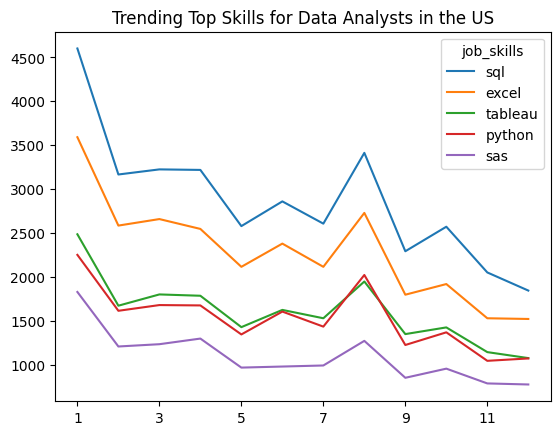

In [12]:
df_DA_US_plot = df_DA_US_pivot.iloc[:, :5].plot(kind='line')
plt.title('Trending Top Skills for Data Analysts in the US')
plt.xlabel('')

This is good but totals can be misleading without context. Percentages clarify relationships within the whole, giving a more accurate comparison.

## Calculate Percentage of Total Jobs

Calculates the total number of entries for each month in `df_DA` by grouping the data by 'month' and counting the number of occurrences in each group, storing the results in `DA_totals`. This is needed to compute the percentages.

In [33]:
DA_totals = df_DA_US['month_posted'].value_counts().sort_index()
DA_totals

month_posted
1     8494
2     6124
3     6218
4     6049
5     4993
6     5683
7     5201
8     6634
9     4639
10    5271
11    4531
12    3979
Name: count, dtype: int64

This code calculates the percentage of each skill's occurrence for each month by dividing the first 12 rows of the `df_DA_pivot` DataFrame, which contains skill counts, by the monthly totals in `DA_totals` and multiplying by 100. The new DataFrame, `df_DA_pivot_percent`, shows skill distributions as percentages of total monthly job entries.

In [ ]:
df_DA_US_percent = df_DA_US_pivot.mul(100/DA_totals, axis=0)

# convert month number to full month name
df_DA_US_percent = df_DA_US_percent.reset_index()
df_DA_US_percent['job_posted_month'] = df_DA_US_percent['month_posted'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_US_percent = df_DA_US_percent.set_index('job_posted_month')
df_DA_US_percent = df_DA_US_percent.drop('month_posted', axis=1)

df_DA_US_percent

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,...,google chat,openstack,theano,asp.net core,qt,couchdb,capacitor,codecommit,chainer,msaccess
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,54.167648,42.288674,29.291264,26.536379,21.568166,17.812574,15.740523,11.396280,11.443372,8.453026,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011773,0.011773,0.000000,0.000000
Feb,51.730895,42.243632,27.367734,26.420640,19.790986,17.064010,18.321359,12.050947,11.512084,8.393207,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,51.881634,42.795111,29.012544,27.066581,19.909939,18.349952,16.950788,11.836603,10.759087,6.722419,...,0.016082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,53.231939,42.139197,29.575136,27.756654,21.524219,17.159861,17.473963,11.489502,10.745578,7.257398,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.016532,0.000000,0.000000,0.000000,0.000000
May,51.692369,42.419387,28.680152,27.017825,19.467254,17.364310,17.224114,11.155618,10.314440,7.170038,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020028
Jun,50.360725,41.914482,28.646841,28.312511,17.314799,17.895478,17.402780,12.686961,10.980116,7.284885,...,0.000000,0.017596,0.000000,0.000000,0.017596,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,50.163430,40.722938,29.475101,27.648529,19.150163,16.939050,16.939050,11.286291,10.555662,7.710056,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,51.462165,41.166717,29.409105,30.524570,19.234248,19.158879,18.209225,11.335544,11.245101,7.295749,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,49.471869,38.823022,29.165768,26.492779,18.452253,16.081052,17.676223,10.303945,10.239276,7.738737,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Plot Monthly Skill Demand 

Creates a line plot for the top five skills of data analysts, shown as percentages of the total job entries per month, using the first 5 columns of the `df_DA_percent` DataFrame. Also the legend is moved outside of the plot for readability.

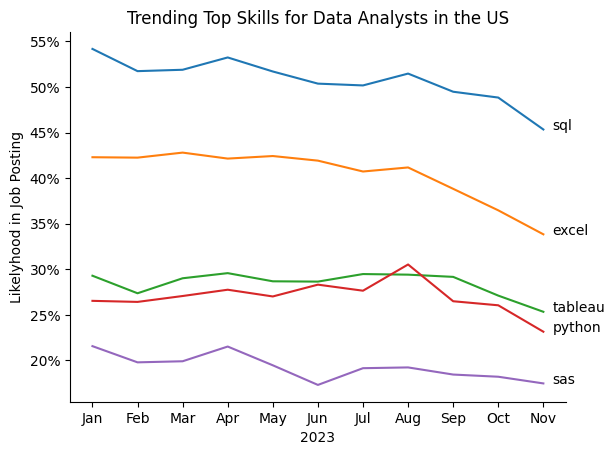

In [82]:
from matplotlib.ticker import PercentFormatter

df_plot = df_DA_US_percent.iloc[:11, :5]

sns.lineplot(data=df_plot, legend=False, dashes=False)
sns.despine()
plt.title('Trending Top Skills for Data Analysts in the US')
plt.xlabel('2023')
plt.ylabel('Likelyhood in Job Posting')
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))

for i in range(5):
    plt.text(10.2, df_plot.iloc[-1, i], df_plot.columns[i], color='black')